In [ ]:
!pip install scprep phate  anndata umap-learn magic-impute hdbscan
import scprep

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Matplotlib command for Jupyter notebooks only
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 994 kB/s 
     |████████████████████████████████| 96 kB 2.2 MB/s 
     |████████████████████████████████| 88 kB 4.6 MB/s 
     |████████████████████████████████| 5.2 MB 39.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 416 kB 42.2 MB/s 
     |████████████████████████████████| 45 kB 2.8 MB/s 
     |████████████████████████████████| 1.8 MB 20.3 MB/s 
     |████████████████████████████████| 1.1 MB 43.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=01c2caac99a9a2a937164e76c3f29cea29d7ba42851ed192800318d9cb946735
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import umap

from google.colab import drive

In [ ]:
raw = pd.read_csv('/content/drive/MyDrive/MCF7 PRO/MAGIC/X_magic_impu.csv',sep=',')

In [ ]:
raw = raw.drop('Unnamed: 0',axis=1)

In [ ]:
#raw= raw.set_index('Unnamed: 0')

In [ ]:
raw

In [ ]:
PCA_3D = pd.read_csv('/content/3dPCAmagic.csv',sep=',')
PCA_3D

,Unnamed: 0,PC1,PC2,PC3
0,0,4.377553,-0.956144,-0.427901
1,1,0.633661,-0.172782,0.572534
2,2,4.572239,-0.773941,-0.000835
3,3,4.371543,-0.503369,-0.073993
4,4,5.288968,-0.614267,-0.198078
...,...,...,...,...
358,358,1.213099,0.077843,-0.077165
359,359,-1.655196,-0.125460,0.116538
360,360,-3.962395,0.073377,-0.388407
361,361,-2.693631,0.227651,-0.059828


In [ ]:
cluster = pd.read_csv('/content/3DPCAHDBSCANIMPUTATIONMAGIC.csv',sep=',')

In [ ]:
cluster

,Unnamed: 0,Cluster
0,0,2
1,1,4
2,2,2
3,3,2
4,4,2
...,...,...
358,358,-1
359,359,4
360,360,4
361,361,4


In [ ]:
PCA_3D

,Unnamed: 0,PC1,PC2,PC3
0,0,4.377553,-0.956144,-0.427901
1,1,0.633661,-0.172782,0.572534
2,2,4.572239,-0.773941,-0.000835
3,3,4.371543,-0.503369,-0.073993
4,4,5.288968,-0.614267,-0.198078
...,...,...,...,...
358,358,1.213099,0.077843,-0.077165
359,359,-1.655196,-0.125460,0.116538
360,360,-3.962395,0.073377,-0.388407
361,361,-2.693631,0.227651,-0.059828


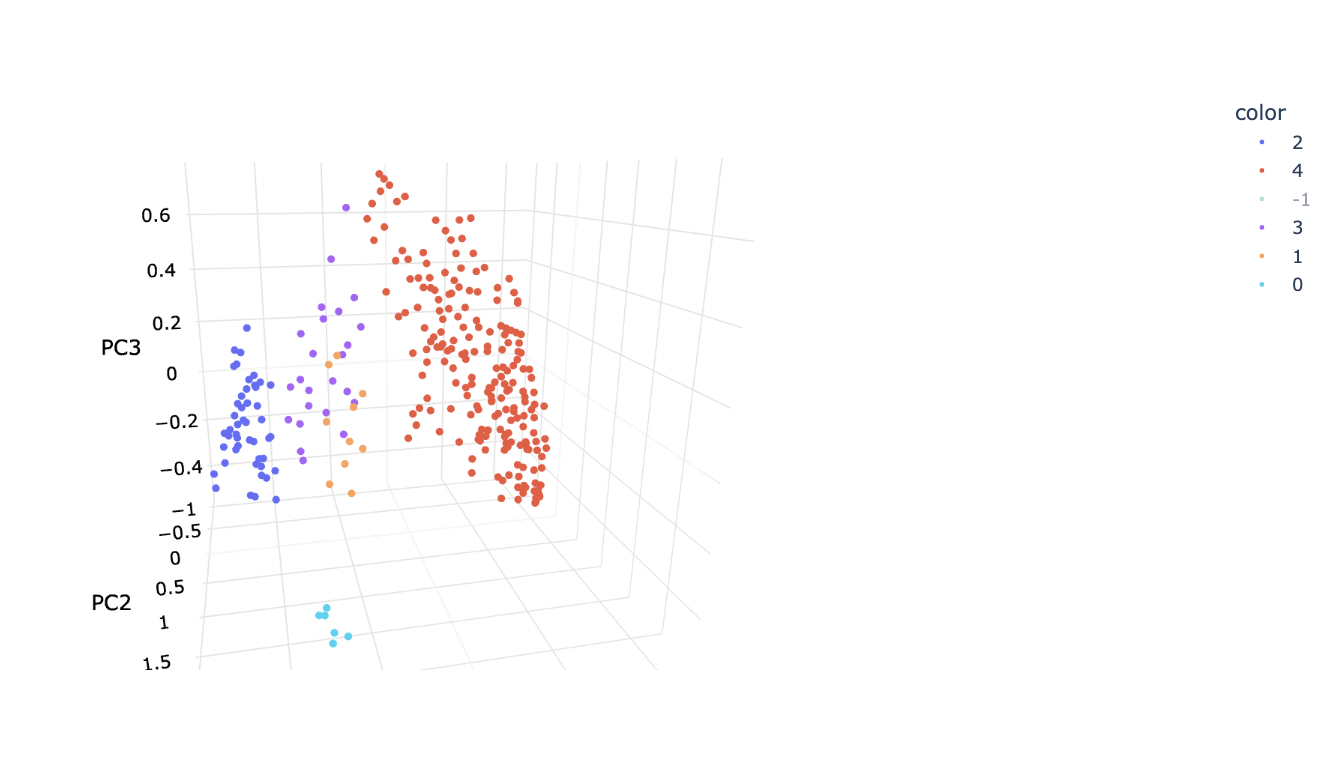

In [ ]:
cluster

,Unnamed: 0,Cluster
0,0,2
1,1,4
2,2,2
3,3,2
4,4,2
...,...,...
358,358,-1
359,359,4
360,360,4
361,361,4


In [ ]:
exp_diff = raw
clusters = cluster
clusters

,Unnamed: 0,Cluster
0,0,2
1,1,4
2,2,2
3,3,2
4,4,2
...,...,...
358,358,-1
359,359,4
360,360,4
361,361,4


In [ ]:
import plotly.express as px
import plotly

fig = px.scatter_3d(PCA_3D,  x="PC1", y="PC2",z='PC3', color = pd.Categorical(clusters['Cluster']))
             
fig.update_traces(marker=dict(size=3))
fig.update_layout(
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='#E5E5E5')))
fig.update_layout(scene_aspectmode='cube')
camera = dict(
    eye=dict(x=-2.5, y=-1., z=0.2),
    
)

fig.update_layout(scene_camera=camera)

fig.show()

In [ ]:
exp_diff['clusters'] = clusters['Cluster']
exp_diff


In [ ]:
exp_diff[exp_diff['clusters'] == 1]
exp_diff['clusters'] != -1
exp_diff_ok = exp_diff[exp_diff['clusters']  != -1]
exp_diff_ok
EXP = exp_diff_ok.iloc[:,:23922]
EXP
cluster = exp_diff_ok['clusters']
x=scprep.stats.differential_expression_by_cluster(EXP, cluster, measure='emd', direction='both', gene_names=None, n_jobs=-2)
x

{0:                     emd   rank
 MT-RNR2        1.263749      0
 MT-ND4         1.247017      1
 FTH1          -1.066030      2
 MT-CO2         1.040994      3
 MT-CO1         0.941396      4
 ...                 ...    ...
 RP11-160C18.4  0.000000  23917
 RP11-15E18.1   0.000000  23918
 RP11-159H20.3  0.000000  23919
 RP11-159F24.3  0.000000  23920
 RPL29P28       0.000000  23921
 
 [23922 rows x 2 columns], 1:                     emd   rank
 FTH1          -0.899777      0
 MT-ND4         0.821002      1
 MT-RNR2        0.812004      2
 MT-CO2         0.681440      3
 MT-CO1         0.618403      4
 ...                 ...    ...
 CXCL9          0.000000  23917
 RNU6-1190P     0.000000  23918
 CXCR2          0.000000  23919
 RP11-362K14.5  0.000000  23920
 RP11-69M1.3    0.000000  23921
 
 [23922 rows x 2 columns], 2:                emd   rank
 FTH1     -1.493458      0
 TFF1     -0.850790      1
 TUBA1B    0.783885      2
 S100A9   -0.776769      3
 MT-ND4    0.718839      4
 ... 

In [ ]:
emd = pd.DataFrame([       x[0]['emd'].rename('0'),      x[1]['emd'].rename('1'),
               x[2]['emd'].rename('2')  , x[3]['emd'].rename('3') ,
                 x[4]['emd'].rename('4') ])


In [ ]:
emd

,MT-RNR2,MT-ND4,FTH1,MT-CO2,MT-CO1,MT-CYB,MT-CO3,MT-ND1,MT-ATP6,TFF1,...,CTD-2162K18.3,CTD-2184D3.3,CTD-2187J20.1,RP11-163E9.1,RP11-160O5.1,RP11-160C18.4,RP11-15E18.1,RP11-159H20.3,RP11-159F24.3,RPL29P28
0,1.263749,1.247017,-1.066030,1.040994,0.941396,0.918671,0.806199,0.802419,0.706277,-0.536681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.812004,0.821002,-0.899777,0.681440,0.618403,0.607081,0.532763,0.521160,0.470915,-0.477653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.565134,0.718839,-1.493458,0.569392,0.520490,0.525090,0.462774,0.405652,0.428681,-0.850790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.350789,0.447401,-0.879762,0.355093,0.324883,0.328082,0.288483,0.253067,0.266925,-0.507985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.674000,-0.808496,1.452028,-0.648053,-0.591445,-0.592952,-0.521734,-0.470147,-0.477861,0.813688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


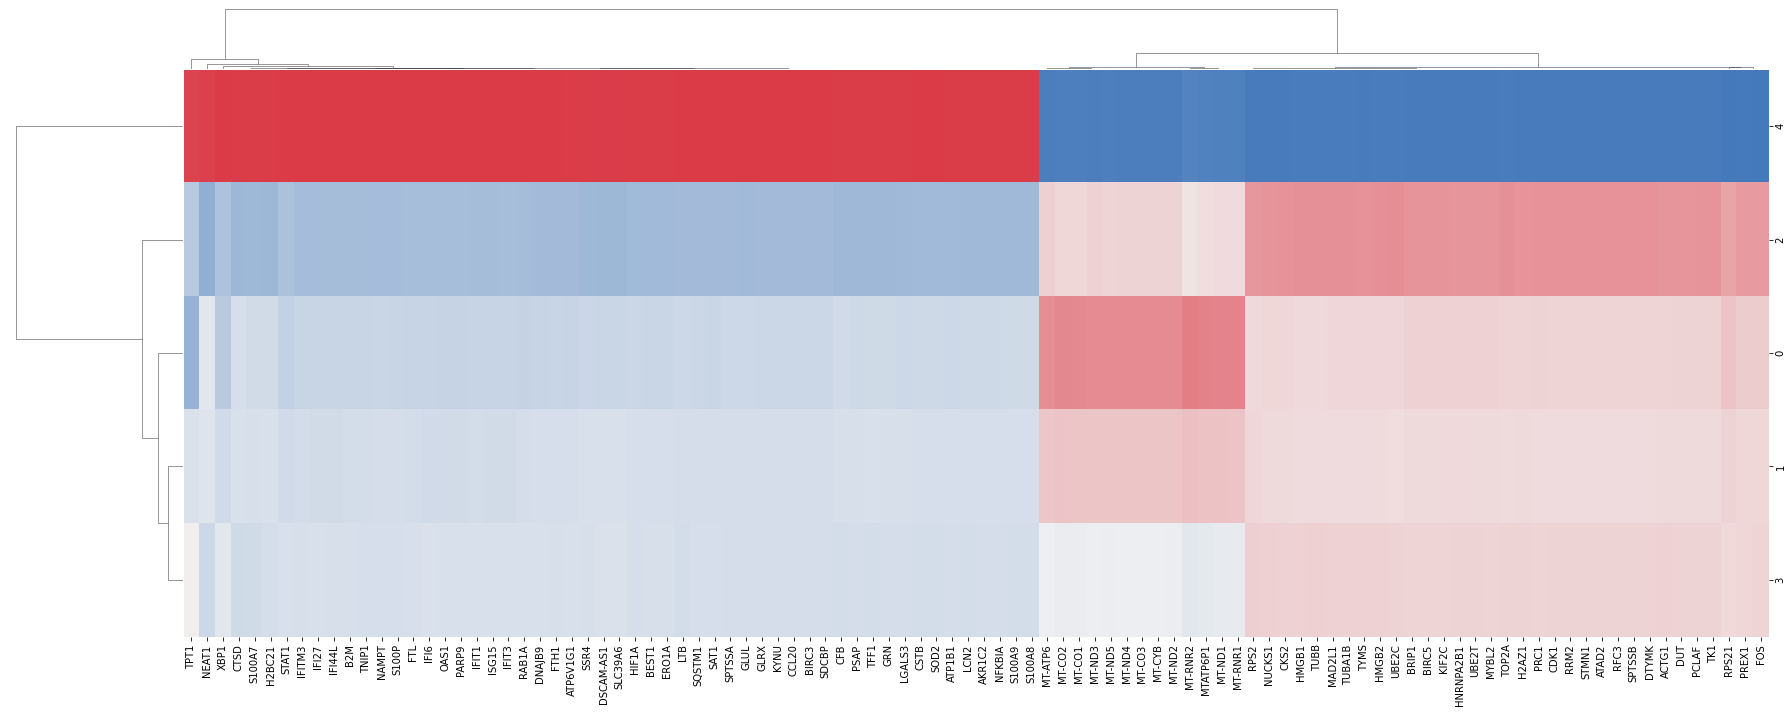

In [ ]:
import seaborn as sns
sns.clustermap(emd.iloc[:,:100],cmap=sns.diverging_palette(250, 10, as_cmap=True),z_score=1,figsize=(25, 10),dendrogram_ratio=0.1,cbar_pos=None)

In [ ]:
emd.to_csv('EMDMAGIC_clusters.csv')